# Developing a Deep Learning based classifier to detect presence of Malarial Parasite in cell images

In [1]:
# Loading all dependencies

import os
import numpy as np
import pandas as pd
import cv2
import time
import random
import matplotlib.pyplot as plt

In [2]:
# Changing the path to the plasmodium image folder

path = "/Users/abhinavmathur/Downloads/cell_images"

image_types = os.listdir(path)
image_types = image_types[1:3]
print(image_types)

['Parasitized', 'Uninfected']


We will first try to read the image only as a grayscale image and see if it is possible to differentiate between an infected and uninfected image

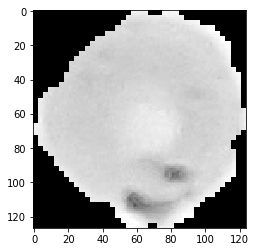

In [3]:
#Read the parasite image

img_par = cv2.imread(path+"/Parasitized/C99P60ThinF_IMG_20150918_142334_cell_9.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img_par, cmap='gray')  # graph it
plt.show()  # display!

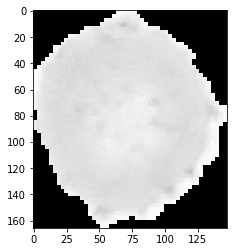

In [4]:
# Read non parasite image

img_par2 = cv2.imread(path+"/Uninfected/C99P60ThinF_IMG_20150918_142128_cell_55.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img_par2, cmap='gray')  # graph it
plt.show()  # display!

There seems to be difference in the shading, we will first try the classification with only gray scale

In [ ]:
# Reading all images

start_time = time.time()
Data =[]

for infec in image_types:
    infection_type = image_types.index(infec)
    #print(infection_type)
    path_image=os.path.join(path,infec)
    #print(path_image)
    images = os.listdir(path_image)
    for image in images:
        try:
            slide_image = cv2.imread(os.path.join(path_image,image), cv2.IMREAD_GRAYSCALE)
            slide_image2 = cv2.resize(slide_image,(100,100))
            Data.append([slide_image2,infection_type])
        except Exception as e: #Simply skip over the exceptions, added this later
            pass
        
print("--- %s seconds taken to load data---" % (time.time() - start_time))

In [ ]:
#Randomising the class types so as to not confuse the model.

random.shuffle(Data)

for sample in Data[:10]:
    print(sample[1])

In [ ]:
#Reshaping the data for classification

X = []
Y = []

for features,label in Data:
    X.append(features)
    Y.append(label)

X = np.array(X).reshape(-1,100,100,1)

In [ ]:
# Import CNN dependencies

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [ ]:
model = Sequential()
model.add(Conv2D(50, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(50, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(30))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, Y, batch_size=32, epochs=3, validation_split=0.3)

As the accuracy is not improving we will need to redo the exercise using RGB clasification
Since we are detecting plasmodium stains, we will go ahead with completing the exercise with color

In [2]:
cap = cv2.VideoCapture(5)

In [4]:
et, frame = cap.read()